In [21]:
from bs4 import BeautifulSoup
from selenium import webdriver
import selenium
from urllib.parse import  urlparse
import time
import lxml
from urllib.request import urlopen
from selenium.webdriver.common.keys import Keys
import numpy as np
import pandas as pd
import re
import pickle
from contextlib import suppress
import matplotlib.pyplot as plt
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate, KFold
from tqdm import tqdm

from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [22]:
from collections import Counter
import os
plt.rcParams["font.family"] = 'Malgun Gothic'
paths = os.listdir("C:/netsong7/pythonwork/AI/finalproject/data cleaning(final)")

In [23]:
df = pd.read_csv("C:/netsong7/pythonwork/AI/finalproject/data cleaning(final)/"+paths[-1], encoding='utf-8-sig')
print(paths[-1])

youtube_comment.csv


In [24]:
df.head()

,review,keyword
0,끝없는 맥북 논란과 이슈이번에는 화면만 열어도 깨지는디스플레이가 도마 위에 올랐습니다,M1
1,맥북 프로 인치가 저렇게 된 적 있는데 이건 만의 문제가 아니라 맥북 의 문제인 것...,M1
2,개인적으로 애플은 내구성에 대해 조금더 발전된 모습이 필요해 보이는거 같음 아무리 ...,M1
3,고압적인 정책 강제적인 업그레이드 정책 제한된 자유도 이 가지때문에 전 애플로 못...,M1
4,이 영상을 맥북으로 보는 심정이 참 ㅜㅜ,M1


In [25]:
df.drop_duplicates(subset = ['review'], inplace=True) # 중복 제거
df['review'] = df['review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
df['review'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
df = df.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(df))

전처리 후 테스트용 샘플의 개수 : 51278


C:\Users\not14\anaconda3\envs\tf1\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [26]:
df['review'] = df['review'].str.replace('^ +', "")
df['review'].replace('', np.nan, inplace=True)
print(df.isnull().sum())

df.loc[df.review.isnull()][:5]

df = df.dropna(how = 'any')
print(len(df))

C:\Users\not14\anaconda3\envs\tf1\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


review     0
keyword    0
dtype: int64
51278


In [27]:
df.head()

,review,keyword
0,끝없는 맥북 논란과 이슈이번에는 화면만 열어도 깨지는디스플레이가 도마 위에 올랐습니다,M1
1,맥북 프로 인치가 저렇게 된 적 있는데 이건 만의 문제가 아니라 맥북 의 문제인 것...,M1
2,개인적으로 애플은 내구성에 대해 조금더 발전된 모습이 필요해 보이는거 같음 아무리 ...,M1
3,고압적인 정책 강제적인 업그레이드 정책 제한된 자유도 이 가지때문에 전 애플로 못...,M1
4,이 영상을 맥북으로 보는 심정이 참 ㅜㅜ,M1


# 유튜브 댓글 keyword 별 pie plot

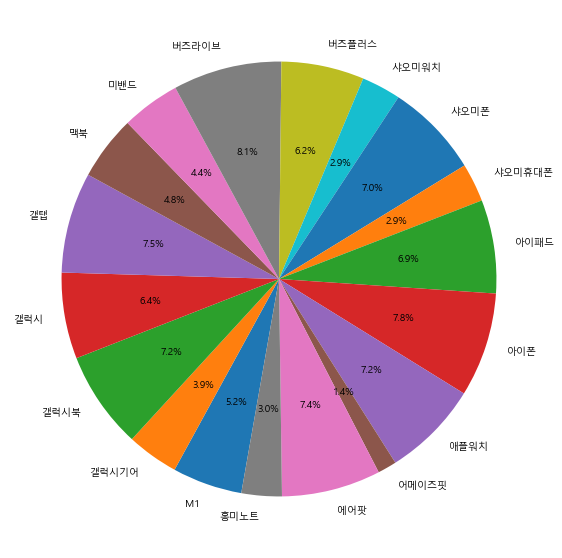

전처리 후 테스트용 샘플의 개수 : 51278


In [28]:

plt.figure(figsize=(12, 10))
ratio = []
labels = []
for word in df["keyword"].unique():
    ratio.append(len(df[df["keyword"]==word]))
    labels.append(word)
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False)
plt.show()
print('전처리 후 테스트용 샘플의 개수 :',sum(ratio))


# 유튜브 전체 댓글 길이 분포

리뷰의 최대 길이 : 3778
리뷰의 평균 길이 : 43.561897889933306


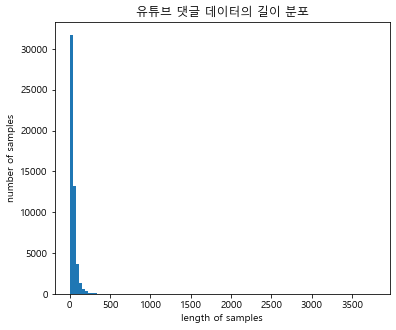

In [29]:
    plt.figure(figsize=(6,5))
    print('리뷰의 최대 길이 :',max(len(l) for l in df["review"]))
    print('리뷰의 평균 길이 :',sum(map(len, df["review"]))/len(df["review"]))
    plt.hist([len(s) for s in df["review"]], bins=100)
    plt.xlabel('length of samples')
    plt.ylabel('number of samples')
    plt.title("유튜브 댓글 데이터의 길이 분포")
    plt.show()

# 회사 별 pie plot

In [30]:
apple = ['M1', '맥북', '아이패드', '아이폰', '애플워치', '에어팟']
samsung = ['갤럭시기어', '갤럭시북', '갤럭시', '갤탭', '버즈라이브', '버즈플러스']
xiaomi = ['미밴드', '샤오미워치', '샤오미폰', '샤오미휴대폰', '어메이즈핏','홍미노트']
company = []
for word in df["keyword"]:
    if word in apple:
        company.append("apple")
    if word in samsung:
        company.append("samsung")
    if word in xiaomi:
        company.append("xiaomi")
df["company"] = company

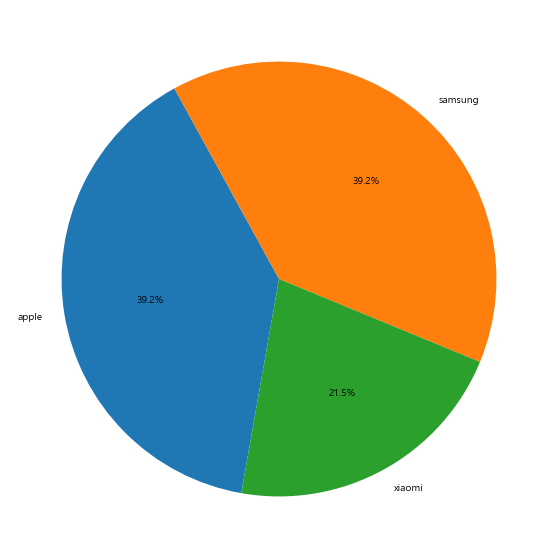

전처리 후 테스트용 샘플의 개수 : 51278


In [31]:
plt.figure(figsize=(12, 10))
ratio = []
labels = []
for word in df["company"].unique():
    ratio.append(len(df[df["company"]==word]))
    labels.append(word)
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False)
plt.show()
print('전처리 후 테스트용 샘플의 개수 :',sum(ratio))

In [32]:
print(df["company"].unique())
print(ratio)

['apple' 'samsung' 'xiaomi']
[20117, 20111, 11050]


# 회사 별 전체 댓글 길이 분포

리뷰의 최대 길이 : 2305
리뷰의 평균 길이 : 41.45414326191778


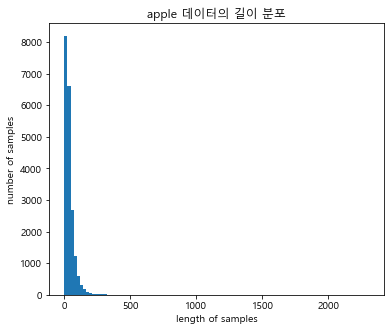

리뷰의 최대 길이 : 3778
리뷰의 평균 길이 : 47.91939734473671


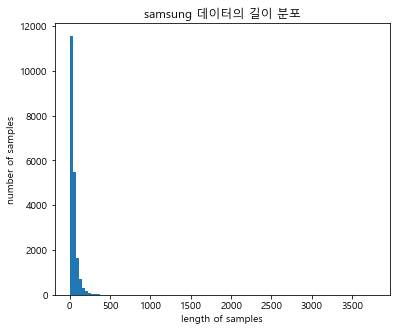

리뷰의 최대 길이 : 2609
리뷰의 평균 길이 : 39.46850678733032


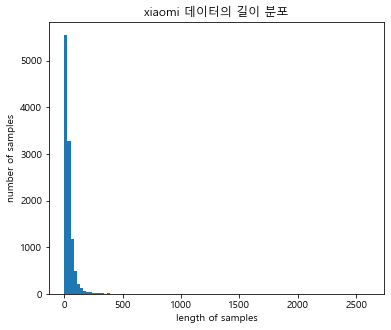

In [33]:

for word in df["company"].unique():
    plt.figure(figsize=(6,5))
    print('리뷰의 최대 길이 :',max(len(l) for l in df[df["company"]==word]["review"]))
    print('리뷰의 평균 길이 :',sum(map(len, df[df["company"]==word]["review"]))/len(df[df["company"]==word]["review"]))
    plt.hist([len(s) for s in df[df["company"]==word]["review"]], bins=100)
    plt.xlabel('length of samples')
    plt.ylabel('number of samples')
    plt.title(word+" "+"데이터의 길이 분포")
    plt.show()

# keyword 별 전체 댓글 길이 분포

리뷰의 최대 길이 : 967
리뷰의 평균 길이 : 42.92004504504504


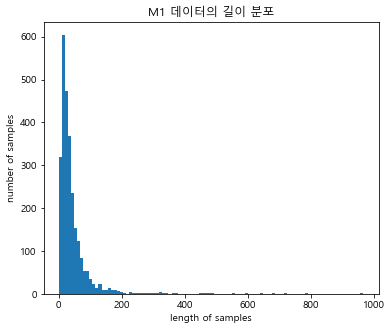

리뷰의 최대 길이 : 1017
리뷰의 평균 길이 : 47.70481012658228


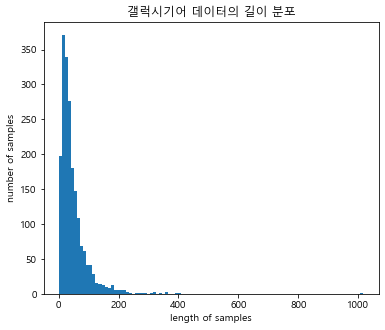

리뷰의 최대 길이 : 2290
리뷰의 평균 길이 : 50.1235531628533


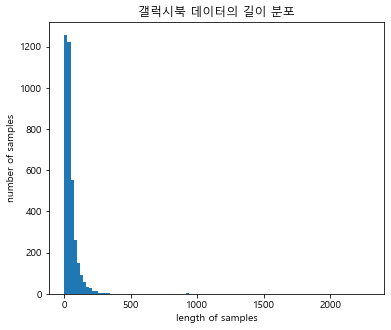

리뷰의 최대 길이 : 843
리뷰의 평균 길이 : 45.83526187576127


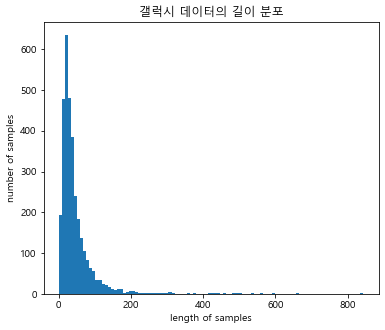

리뷰의 최대 길이 : 1103
리뷰의 평균 길이 : 53.21110242376857


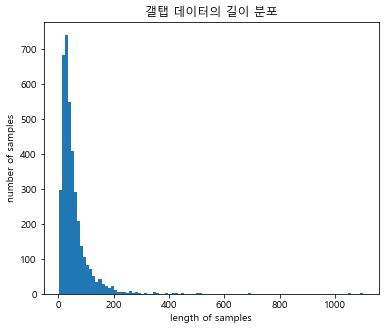

리뷰의 최대 길이 : 606
리뷰의 평균 길이 : 46.48796409628723


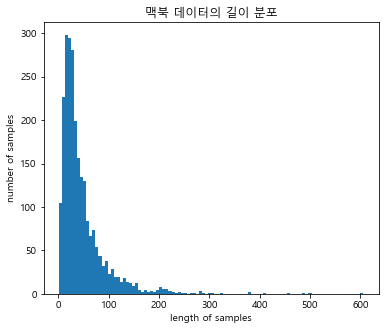

리뷰의 최대 길이 : 556
리뷰의 평균 길이 : 39.832662192393734


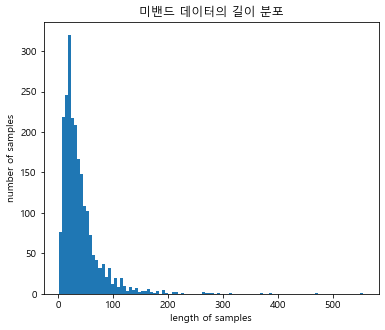

리뷰의 최대 길이 : 3778
리뷰의 평균 길이 : 44.988655563601256


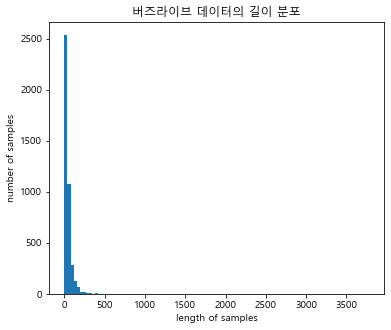

리뷰의 최대 길이 : 1215
리뷰의 평균 길이 : 45.04244535951853


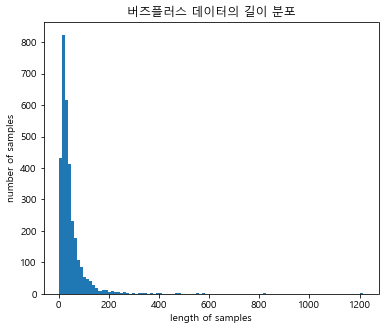

리뷰의 최대 길이 : 2609
리뷰의 평균 길이 : 39.682454969979986


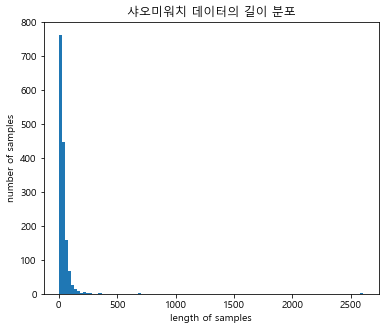

리뷰의 최대 길이 : 735
리뷰의 평균 길이 : 38.43875278396437


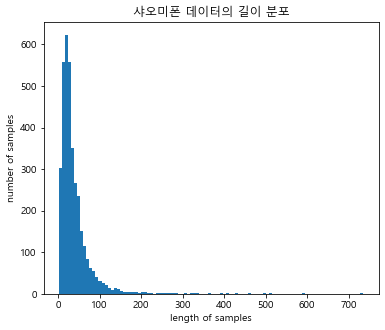

리뷰의 최대 길이 : 424
리뷰의 평균 길이 : 36.59713701431493


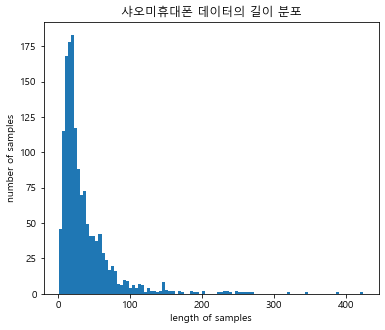

리뷰의 최대 길이 : 1380
리뷰의 평균 길이 : 44.1103003087286


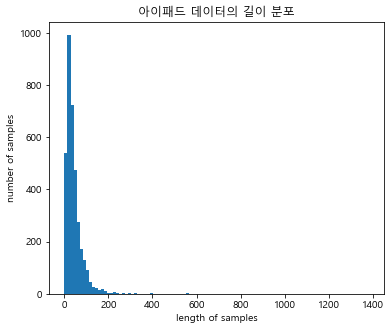

리뷰의 최대 길이 : 1177
리뷰의 평균 길이 : 38.48918511066398


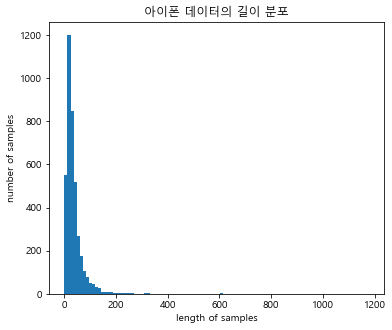

리뷰의 최대 길이 : 1772
리뷰의 평균 길이 : 41.28524945770065


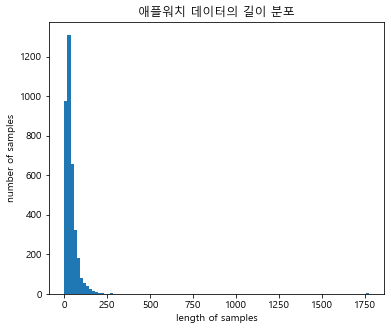

리뷰의 최대 길이 : 512
리뷰의 평균 길이 : 42.99167822468793


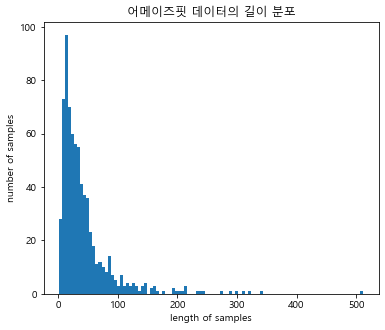

리뷰의 최대 길이 : 2305
리뷰의 평균 길이 : 37.932185430463576


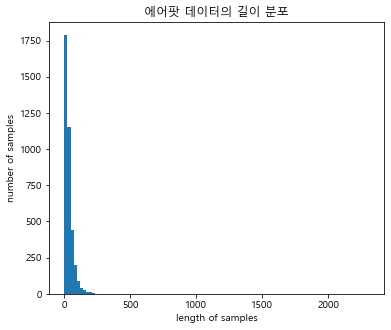

리뷰의 최대 길이 : 591
리뷰의 평균 길이 : 42.2265625


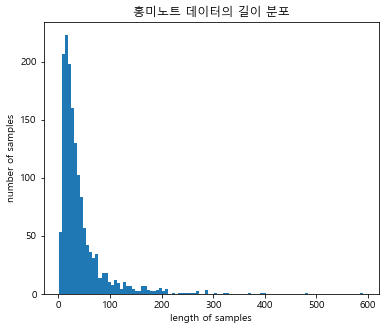

In [34]:
for word in df["keyword"].unique():
    plt.figure(figsize=(6,5))
    print('리뷰의 최대 길이 :',max(len(l) for l in df[df["keyword"]==word]["review"]))
    print('리뷰의 평균 길이 :',sum(map(len, df[df["keyword"]==word]["review"]))/len(df[df["keyword"]==word]["review"]))
    plt.hist([len(s) for s in df[df["keyword"]==word]["review"]], bins=100)
    plt.xlabel('length of samples')
    plt.ylabel('number of samples')
    plt.title(word+" "+"데이터의 길이 분포")
    plt.show()

# 유튜브 댓글 keyword 별 형태소 랭크

In [35]:
okt = Okt()
stopwords = pd.read_table("C:/netsong7/pythonwork/AI/stopwords1.txt", encoding='utf-8-sig', header=None,error_bad_lines=False)
stopwords = list(stopwords[0])

b'Skipping line 276: expected 1 fields, saw 2\n'


In [36]:
keyword = df["keyword"].unique()

In [37]:
for word in keyword:    
    positve = []
    for sentence in df[df["keyword"]==word]["review"]:
        temp_X = okt.morphs(sentence, stem=True) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        positve.append(temp_X)
    words_positve = np.hstack(positve)
    words_positve_count = Counter(words_positve)
    print(word+"======"+word+"======")
    print(words_positve_count.most_common(100))
    print("==================================================================================================================")

M1======M1======
[('있다', 416), ('보다', 402), ('되다', 388), ('좋다', 322), ('애플', 284), ('영상', 248), ('없다', 224), ('이다', 223), ('요', 198), ('너무', 197), ('아니다', 189), ('맥북', 185), ('만', 177), ('안', 177), ('프로', 151), ('진짜', 151), ('가다', 150), ('나오다', 150), ('아이맥', 150), ('자다', 149), ('쓰다', 146), ('사용', 143), ('더', 135), ('오다', 134), ('ㅋㅋ', 132), ('아이패드', 131), ('인텔', 129), ('님', 128), ('적', 125), ('사다', 121), ('윈도우', 121), ('않다', 120), ('거', 114), ('맥', 114), ('ㅠㅠ', 109), ('성능', 108), ('생각', 107), ('수', 107), ('소리', 107), ('인치', 104), ('ㅋㅋㅋ', 103), ('들다', 100), ('그렇다', 97), ('형', 94), ('ㅎㅎ', 91), ('못', 90), ('세대', 87), ('용', 87), ('알다', 86), ('일', 86), ('해주다', 85), ('하고', 84), ('중', 82), ('정도', 81), ('총', 80), ('그냥', 79), ('안되다', 78), ('이번', 75), ('보고', 75), ('만들다', 75), ('코어', 75), ('인데', 74), ('서', 74), ('정말', 74), ('리뷰', 73), ('감사하다', 73), ('내', 71), ('말', 71), ('사람', 71), ('싶다', 71), ('면', 70), ('노트북', 70), ('살다', 69), ('칩', 67), ('마이크', 67), ('제품', 66), ('ㅋㅋㅋㅋ', 66), ('많다', 66), ('오늘', 

미밴드======미밴드======
[('밴드', 581), ('밉다', 506), ('있다', 371), ('되다', 319), ('좋다', 290), ('보다', 244), ('요', 199), ('없다', 177), ('이다', 171), ('님', 157), ('아니다', 155), ('안', 146), ('워치', 144), ('영상', 140), ('만', 140), ('쓰다', 132), ('진짜', 132), ('너무', 129), ('자다', 119), ('알다', 118), ('핏', 113), ('나오다', 113), ('ㅠㅠ', 112), ('선수', 109), ('김연경', 108), ('감사하다', 107), ('수', 103), ('어떻다', 103), ('사람', 100), ('잇다', 97), ('사다', 97), ('사용', 97), ('오다', 96), ('거', 96), ('중', 94), ('더', 94), ('가다', 94), ('기능', 93), ('리뷰', 91), ('않다', 90), ('안되다', 89), ('섭', 88), ('하고', 82), ('인데', 82), ('운동', 80), ('못', 80), ('받다', 78), ('애플', 76), ('형', 73), ('갤럭시', 73), ('해주다', 72), ('설정', 72), ('보고', 71), ('갓', 68), ('가능하다', 67), ('ㅎㅎ', 66), ('화면', 66), ('알림', 66), ('랑', 64), ('구매', 64), ('면', 64), ('들다', 63), ('돼다', 62), ('충전', 62), ('살다', 61), ('모르다', 61), ('적', 60), ('아이폰', 60), ('정말', 59), ('ㅋㅋ', 58), ('샤오미', 56), ('차다', 55), ('그냥', 55), ('내', 55), ('말', 55), ('박수홍', 54), ('나다', 53), ('뭐', 53), ('많다', 52), ('그렇다',

아이패드======아이패드======
[('아이패드', 1288), ('있다', 702), ('프로', 689), ('보다', 678), ('영상', 670), ('좋다', 635), ('너무', 514), ('세대', 493), ('에어', 477), ('사다', 351), ('되다', 340), ('요', 334), ('쓰다', 325), ('ㅠㅠ', 314), ('님', 285), ('진짜', 275), ('미니', 270), ('사용', 252), ('없다', 244), ('자다', 233), ('가다', 220), ('만', 217), ('ㅎㅎ', 211), ('이다', 208), ('보고', 207), ('중', 206), ('감사하다', 198), ('안', 194), ('랑', 194), ('오다', 191), ('필기', 189), ('더', 188), ('거', 184), ('아니다', 175), ('하고', 166), ('인치', 165), ('인데', 161), ('고민', 159), ('나오다', 158), ('어떻다', 152), ('애플', 148), ('싶다', 140), ('수', 139), ('많이', 136), ('ㅠ', 135), ('해주다', 133), ('공부', 132), ('알다', 129), ('살다', 129), ('생각', 123), ('넘다', 122), ('들다', 121), ('정말', 120), ('쓸다', 118), ('언니', 118), ('구매', 116), ('노트', 116), ('않다', 113), ('키', 113), ('기', 111), ('ㅋㅋ', 110), ('용', 110), ('케이스', 107), ('패드', 105), ('앱', 105), ('전', 105), ('정보', 104), ('오늘', 103), ('추천', 103), ('이쁘다', 103), ('부럽다', 102), ('크다', 101), ('못', 101), ('그림', 101), ('ㅋㅋㅋ', 98), ('분', 9

In [38]:
from konlpy.tag import Mecab
from konlpy.tag import Twitter
twitter = Twitter()

C:\Users\not14\anaconda3\envs\tf1\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [39]:
for word in keyword:    
    positve = []
    for sentence in df[df["keyword"]==word]["review"]:
        temp_X = twitter.morphs(sentence, stem=True) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        positve.append(temp_X)
    words_positve = np.hstack(positve)
    words_positve_count = Counter(words_positve)
    print(word+"======"+word+"======")
    print(words_positve_count.most_common(100))
    print("==================================================================================================================")

M1======M1======
[('있다', 416), ('보다', 402), ('되다', 388), ('좋다', 322), ('애플', 284), ('영상', 248), ('없다', 224), ('이다', 223), ('요', 198), ('너무', 197), ('아니다', 189), ('맥북', 185), ('만', 177), ('안', 177), ('프로', 151), ('진짜', 151), ('가다', 150), ('나오다', 150), ('아이맥', 150), ('자다', 149), ('쓰다', 146), ('사용', 143), ('더', 135), ('오다', 134), ('ㅋㅋ', 132), ('아이패드', 131), ('인텔', 129), ('님', 128), ('적', 125), ('사다', 121), ('윈도우', 121), ('않다', 120), ('거', 114), ('맥', 114), ('ㅠㅠ', 109), ('성능', 108), ('생각', 107), ('수', 107), ('소리', 107), ('인치', 104), ('ㅋㅋㅋ', 103), ('들다', 100), ('그렇다', 97), ('형', 94), ('ㅎㅎ', 91), ('못', 90), ('세대', 87), ('용', 87), ('알다', 86), ('일', 86), ('해주다', 85), ('하고', 84), ('중', 82), ('정도', 81), ('총', 80), ('그냥', 79), ('안되다', 78), ('이번', 75), ('보고', 75), ('만들다', 75), ('코어', 75), ('인데', 74), ('서', 74), ('정말', 74), ('리뷰', 73), ('감사하다', 73), ('내', 71), ('말', 71), ('사람', 71), ('싶다', 71), ('면', 70), ('노트북', 70), ('살다', 69), ('칩', 67), ('마이크', 67), ('제품', 66), ('ㅋㅋㅋㅋ', 66), ('많다', 66), ('오늘', 

미밴드======미밴드======
[('밴드', 581), ('밉다', 506), ('있다', 371), ('되다', 319), ('좋다', 290), ('보다', 244), ('요', 199), ('없다', 177), ('이다', 171), ('님', 157), ('아니다', 155), ('안', 146), ('워치', 144), ('영상', 140), ('만', 140), ('쓰다', 132), ('진짜', 132), ('너무', 129), ('자다', 119), ('알다', 118), ('핏', 113), ('나오다', 113), ('ㅠㅠ', 112), ('선수', 109), ('김연경', 108), ('감사하다', 107), ('수', 103), ('어떻다', 103), ('사람', 100), ('잇다', 97), ('사다', 97), ('사용', 97), ('오다', 96), ('거', 96), ('중', 94), ('더', 94), ('가다', 94), ('기능', 93), ('리뷰', 91), ('않다', 90), ('안되다', 89), ('섭', 88), ('하고', 82), ('인데', 82), ('운동', 80), ('못', 80), ('받다', 78), ('애플', 76), ('형', 73), ('갤럭시', 73), ('해주다', 72), ('설정', 72), ('보고', 71), ('갓', 68), ('가능하다', 67), ('ㅎㅎ', 66), ('화면', 66), ('알림', 66), ('랑', 64), ('구매', 64), ('면', 64), ('들다', 63), ('돼다', 62), ('충전', 62), ('살다', 61), ('모르다', 61), ('적', 60), ('아이폰', 60), ('정말', 59), ('ㅋㅋ', 58), ('샤오미', 56), ('차다', 55), ('그냥', 55), ('내', 55), ('말', 55), ('박수홍', 54), ('나다', 53), ('뭐', 53), ('많다', 52), ('그렇다',

아이패드======아이패드======
[('아이패드', 1288), ('있다', 702), ('프로', 689), ('보다', 678), ('영상', 670), ('좋다', 635), ('너무', 514), ('세대', 493), ('에어', 477), ('사다', 351), ('되다', 340), ('요', 334), ('쓰다', 325), ('ㅠㅠ', 314), ('님', 285), ('진짜', 275), ('미니', 270), ('사용', 252), ('없다', 244), ('자다', 233), ('가다', 220), ('만', 217), ('ㅎㅎ', 211), ('이다', 208), ('보고', 207), ('중', 206), ('감사하다', 198), ('안', 194), ('랑', 194), ('오다', 191), ('필기', 189), ('더', 188), ('거', 184), ('아니다', 175), ('하고', 166), ('인치', 165), ('인데', 161), ('고민', 159), ('나오다', 158), ('어떻다', 152), ('애플', 148), ('싶다', 140), ('수', 139), ('많이', 136), ('ㅠ', 135), ('해주다', 133), ('공부', 132), ('알다', 129), ('살다', 129), ('생각', 123), ('넘다', 122), ('들다', 121), ('정말', 120), ('쓸다', 118), ('언니', 118), ('구매', 116), ('노트', 116), ('않다', 113), ('키', 113), ('기', 111), ('ㅋㅋ', 110), ('용', 110), ('케이스', 107), ('패드', 105), ('앱', 105), ('전', 105), ('정보', 104), ('오늘', 103), ('추천', 103), ('이쁘다', 103), ('부럽다', 102), ('크다', 101), ('못', 101), ('그림', 101), ('ㅋㅋㅋ', 98), ('분', 9

In [50]:
ds_star = pd.read_csv("C:/netsong7/pythonwork/AI/finalproject/data cleaning(final)/shopping_ds.csv")
ds_star.drop_duplicates(subset=['type', 'review', 'star'], inplace=True)
ds_star["label"] = 0
ds_star.loc[ds_star["star"] > 3.5, "label"] = 1
del ds_star["Unnamed: 0"]
ds_star_1_dummy, ds_star_1_train = train_test_split(ds_star[ds_star["label"]==1], test_size=5432, random_state = 42)
ds_star_0_train = ds_star[ds_star["label"]==0]
ds_star_balance = pd.concat([ds_star_1_train, ds_star_0_train])
train_data, test_data = train_test_split(ds_star_balance, test_size=0.3, random_state = 0)
train_data.drop_duplicates(subset=["review", "star"], inplace=True)
test_data.drop_duplicates(subset=["review", "star"], inplace=True)
train_data.loc[train_data.review.isnull()]
train_data = train_data.dropna(how = 'any')
train_data['review'] = train_data['review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
test_data.drop_duplicates(subset = ['review'], inplace=True) # 중복 제거
test_data['review'] = test_data['review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test_data['review'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
train_data['review'] = train_data['review'].str.replace('^ +', "")
train_data['review'].replace('', np.nan, inplace=True)
train_data = train_data.dropna(how = 'any')

okt = Okt()
#stopwords = ['가','게','고','과','네','는','다','도','들','듯','를','에','와','으로',
#             '은','을','의','이','인','임','자','잘','좀','지','하다','한']
stopwords = pd.read_table("C:/netsong7/pythonwork/AI/stopwords1.txt", encoding='utf-8-sig', header=None,error_bad_lines=False)
stopwords = list(stopwords[0])

X_train = []
for sentence in train_data['review']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_train.append(temp_X)

X_test = []
for sentence in test_data['review']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_test.append(temp_X)
    
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value
vocab_size = total_cnt - rare_cnt + 1    

tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)

max_len = 100



C:\Users\not14\anaconda3\envs\tf1\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\not14\anaconda3\envs\tf1\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\not14\anaconda3\envs\tf1\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  
C:\Users\not14\anaconda3\envs\tf1\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWa

In [56]:
df.head(1)

,review,keyword,company
0,끝없는 맥북 논란과 이슈이번에는 화면만 열어도 깨지는디스플레이가 도마 위에 올랐습니다,M1,apple


In [51]:
from keras.models import load_model
model_test = load_model('model_lstm.h5')

In [52]:
def sentiment_predict(new_sentence):
  new_sentence = okt.morphs(new_sentence) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = 100) # 패딩
  score = float(model_test.predict(pad_new)) # 예측
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100))

In [53]:
df["review"][0]

'끝없는  맥북 논란과 이슈이번에는 화면만 열어도 깨지는디스플레이가 도마 위에 올랐습니다'

In [54]:
sentiment_predict(df["review"][0])

53.79% 확률로 부정 리뷰입니다.


In [75]:
label = []
score_list = []
for review in df[df["company"]=="apple"]["review"]:
    new_sentence = okt.morphs(review) # 토큰화
    new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
    encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
    pad_new = pad_sequences(encoded, maxlen = 100)
    score = float(model_test.predict(pad_new))
    if(score > 0.5):
        label.append(1)
        score_list.append(score)
    else:
        label.append(0)
        score_list.append(score)

apple_score = pd.DataFrame([label, score_list]).T
apple_score.columns = ["label", "score"]

In [76]:
apple_score[apple_score["label"]==0].mean()

label    0.000000
score    0.236195
dtype: float64

In [77]:
apple_score[apple_score["label"]==1].mean()

label    1.00000
score    0.77669
dtype: float64

In [78]:
apple_score.describe()

,label,score
count,20117.000000,20117.000000
mean,0.421683,0.464113
std,0.493841,0.304285
min,0.000000,0.000294
25%,0.000000,0.204277
50%,0.000000,0.411476
75%,1.000000,0.736177
max,1.000000,0.999599


In [65]:
label = []
score_list = []
for review in df[df["company"]=="samsung"]["review"]:
    new_sentence = okt.morphs(review) # 토큰화
    new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
    encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
    pad_new = pad_sequences(encoded, maxlen = 100)
    score = float(model_test.predict(pad_new))
    if(score > 0.5):
        label.append(1)
        score_list.append(score)
    else:
        label.append(0)
        score_list.append(score)

samsung_score = pd.DataFrame([label, score_list]).T
samsung_score.columns = ["label", "score"]

In [67]:
samsung_score[samsung_score["label"]==0].mean()

label    0.000000
score    0.224895
dtype: float64

In [68]:
samsung_score[samsung_score["label"]==1].mean()

label    1.000000
score    0.775078
dtype: float64

In [82]:
samsung_score.describe()

,label,score
count,20111.000000,20111.000000
mean,0.394461,0.441921
std,0.488747,0.306040
min,0.000000,0.001033
25%,0.000000,0.172755
50%,0.000000,0.382359
75%,1.000000,0.708176
max,1.000000,0.999583


In [69]:
label = []
score_list = []
for review in df[df["company"]=="xiaomi"]["review"]:
    new_sentence = okt.morphs(review) # 토큰화
    new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
    encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
    pad_new = pad_sequences(encoded, maxlen = 100)
    score = float(model_test.predict(pad_new))
    if(score > 0.5):
        label.append(1)
        score_list.append(score)
    else:
        label.append(0)
        score_list.append(score)

xiaomi_score = pd.DataFrame([label, score_list]).T
xiaomi_score.columns = ["label", "score"]

In [70]:
xiaomi_score[xiaomi_score["label"]==0].mean()

label    0.000000
score    0.230109
dtype: float64

In [83]:
xiaomi_score[xiaomi_score["label"]==1].mean()

label    1.000000
score    0.744083
dtype: float64


In [80]:
xiaomi_score.describe()

,label,score
count,11050.000000,11050.000000
mean,0.365520,0.417977
std,0.481598,0.286300
min,0.000000,0.000631
25%,0.000000,0.171708
50%,0.000000,0.361418
75%,1.000000,0.644604
max,1.000000,0.998846


In [86]:
df[df["keyword"]=="M1"]["company"].unique()[0]

'apple'

In [87]:

for keyword in df["keyword"].unique():
    label = []
    score_list = []
    company = df[df["keyword"]==keyword]["company"].unique()[0]
    df[df["keyword"]==keyword]["company"]
    for review in df[df["keyword"]==keyword]["review"]:
        new_sentence = okt.morphs(review) # 토큰화
        new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
        encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
        pad_new = pad_sequences(encoded, maxlen = 100)
        score = float(model_test.predict(pad_new))
        if(score > 0.5):
            label.append(1)
            score_list.append(score)
        else:
            label.append(0)
            score_list.append(score)

    xiaomi_score = pd.DataFrame([label, score_list]).T
    xiaomi_score.columns = ["label", "score"]
    print(keyword + "  " + company)
    print(xiaomi_score[xiaomi_score["label"]==0].mean())
    print(xiaomi_score[xiaomi_score["label"]==1].mean())
    print(xiaomi_score.describe())
    print('-------------------------------------------------------------------------------------------')
    

M1  apple
label    0.000000
score    0.239886
dtype: float64
label    1.000000
score    0.756351
dtype: float64
             label        score
count  2664.000000  2664.000000
mean      0.394895     0.443835
std       0.488920     0.290931
min       0.000000     0.000294
25%       0.000000     0.200231
50%       0.000000     0.388998
75%       1.000000     0.680971
max       1.000000     0.997786
-------------------------------------------------------------------------------------------
갤럭시기어  samsung
label    0.000000
score    0.223804
dtype: float64
label    1.000000
score    0.760232
dtype: float64
             label        score
count  1975.000000  1975.000000
mean      0.346329     0.409585
std       0.475920     0.292863
min       0.000000     0.003022
25%       0.000000     0.158054
50%       0.000000     0.341415
75%       1.000000     0.647948
max       1.000000     0.997394
-------------------------------------------------------------------------------------------
갤럭시북  samsu

홍미노트  xiaomi
label    0.000000
score    0.236552
dtype: float64
label    1.000000
score    0.756057
dtype: float64
             label        score
count  1536.000000  1536.000000
mean      0.416016     0.452674
std       0.493057     0.294319
min       0.000000     0.000631
25%       0.000000     0.207641
50%       0.000000     0.417226
75%       1.000000     0.704832
max       1.000000     0.998846
-------------------------------------------------------------------------------------------
